# <center><font size=10, color="#8B0A50	"><u> Footbal Transfer </u> </font>

# Tables of contents

1. Business question
2. Importing
3. Wrangle
4. Cleaning
5. Visualization
6. Preprocessing
7. Modeling
8. conclusions

# 1. Business Question

This dataset includes all the operations in the summer window, whether transfers. It is an optimal dataset to perform EDA or analysis of transfer market data by club, country or league.
we want to predict the cost of players by using ML algorithms.

# 2. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

# 3. Wrangle

In [2]:
df=pd.read_csv("Summer22_FootballTransfers.csv")

In [3]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33620 non-null  object 
 1   position             33615 non-null  object 
 2   age                  33477 non-null  float64
 3   origin_club          33620 non-null  object 
 4   league_origin_club   32685 non-null  object 
 5   country_origin_club  32690 non-null  object 
 6   new_club             33615 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  object 
 10  date_of_transfer     33625 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


>data contains on 10 features ( categorical data) and one column is numerical data

In [5]:
df.columns

Index(['name', 'position', 'age', 'origin_club', 'league_origin_club',
       'country_origin_club', 'new_club', 'league_new_club',
       'country_new_club', 'cost', 'date_of_transfer'],
      dtype='object')

In [6]:
df.shape

(33625, 11)

> data has 33625 instances and 11 features

# Run Summary Descriptive Statistics 

In [7]:
df.describe()

,age
count,33477.000000
mean,25.020432
std,4.784488
min,15.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,46.000000


In [8]:
# descripe Categorical Data 
data_descripe = df.describe(include=['O'])
print('=' * 58)
print('\t\tDescription of Categorical Data:')
print('=' * 58)
print(data_descripe.T)
print('=' * 58)


# store 'categorical' or 'non-numerical' features 
non_numeric_fets = data_descripe.columns

print('\n\ncolumns names of categorical(non-numerical) features: \n', non_numeric_fets.values)

		Description of Categorical Data:
                     count unique           top   freq
name                 33620  32577       Rafinha      7
position             33615     16   Centre-Back   5338
origin_club          33620   5819  Without Club    853
league_origin_club   32685    462         Italy    930
country_origin_club  32690    153         Italy   4760
new_club             33615   6317  Without Club   4950
league_new_club      28047    463         Italy    816
country_new_club     28051    139         Italy   4003
cost                 33621    118        €50Th.   5125
date_of_transfer     33625     63      7/1/2022  14375


columns names of categorical(non-numerical) features: 
 ['name' 'position' 'origin_club' 'league_origin_club'
 'country_origin_club' 'new_club' 'league_new_club' 'country_new_club'
 'cost' 'date_of_transfer']


### Dataset problems
1. Some columns has vales that doesn’t have meaning such as Unknown , without club , Retired and career break.

2. Column cost is object and contains symbols as € , th , . and  m . It needs to filtering and converts it into numerical.

3. Column Date of transfer is an object not date.

4. There are NaN values in almost null columns . 

5. Renaming columns , becomes it easy to use . 

6. Range Constrains and remove outliter in Cost feature.

# Handling dataset problems column by column

# 4. cleaning

### Renaming the columns

In [9]:
df.columns

Index(['name', 'position', 'age', 'origin_club', 'league_origin_club',
       'country_origin_club', 'new_club', 'league_new_club',
       'country_new_club', 'cost', 'date_of_transfer'],
      dtype='object')

In [10]:
df.rename({'origin_club':'OriginClub','league_origin_club':'LeagueOriginClub','country_origin_club':'CountryOriginClub',
           'new_club':'NewClub','league_new_club':'LeagueNewClub','country_new_club':'CountryNewClub',
           'date_of_transfer':'DateOfTransfer','name':'Name','position':'Position','cost':'Cost','age':'Age'}
          ,axis=1,inplace=True)

In [11]:
df.columns

Index(['Name', 'Position', 'Age', 'OriginClub', 'LeagueOriginClub',
       'CountryOriginClub', 'NewClub', 'LeagueNewClub', 'CountryNewClub',
       'Cost', 'DateOfTransfer'],
      dtype='object')

### converting DateOfTransfer into date

In [12]:
df['DateOfTransfer']=pd.to_datetime(df['DateOfTransfer'])

In [13]:
df["DateOfTransfer"].dtype

dtype('<M8[ns]')

### what's monthes of transfers players ?

In [14]:
df['MonthOfTransfer']=df["DateOfTransfer"].dt.month

In [15]:
df['MonthOfTransfer'].unique()

array([9, 8, 7], dtype=int64)

### Filtering cost and converting it into numerical

In [16]:
df['Cost'].dtype

dtype('O')

In [17]:
df['Cost']=df['Cost'].str.strip('€')
df['Cost'] = df.Cost.str.replace('Th.','000')
df['Cost'] = df.Cost.str.replace('m','0.000')
df['Cost'] = df.Cost.str.replace('.','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8528\1832840756.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cost'] = df.Cost.str.replace('Th.','000')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8528\1832840756.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Cost'] = df.Cost.str.replace('.','')


In [18]:
df['Cost'].astype

<bound method NDFrame.astype of 0        42000000
1        18000000
2        50000000
3        30000000
4        10000000
           ...   
33620       10000
33621       10000
33622       10000
33623       10000
33624       25000
Name: Cost, Length: 33625, dtype: object>

### Filtering null values

In [19]:
df.isnull().sum()

Name                    5
Position               10
Age                   148
OriginClub              5
LeagueOriginClub      940
CountryOriginClub     935
NewClub                10
LeagueNewClub        5578
CountryNewClub       5574
Cost                    4
DateOfTransfer          0
MonthOfTransfer         0
dtype: int64

In [20]:
df.shape

(33625, 12)

In [21]:
##=================================================================================
#interpolation is a technique in python used to estimate unknown data points between known data points
#interpolation is mostly used to impute missing values in dataframe
##=================================================================================
df['Age'].interpolate(inplace=True)
df['Cost'].interpolate(inplace=True)

In [22]:
df['Position'].fillna(df['Position'].mode().iloc[0],inplace=True)
df.dropna(subset=['Name','OriginClub','LeagueOriginClub','CountryOriginClub','NewClub','LeagueNewClub','CountryNewClub'],inplace=True)

In [23]:
df.isnull().sum()

Name                 0
Position             0
Age                  0
OriginClub           0
LeagueOriginClub     0
CountryOriginClub    0
NewClub              0
LeagueNewClub        0
CountryNewClub       0
Cost                 0
DateOfTransfer       0
MonthOfTransfer      0
dtype: int64

In [24]:
df.shape

(27126, 12)

### convert to integers

In [25]:
df['Age'].dtype

dtype('float64')

In [26]:
df['Age']=df['Age'].astype('int')

In [27]:
df['Cost']=pd.to_numeric(df['Cost']).astype('int')

In [28]:
df['Cost'].dtype

dtype('int32')

In [29]:
df.head()

,Name,Position,Age,OriginClub,LeagueOriginClub,CountryOriginClub,NewClub,LeagueNewClub,CountryNewClub,Cost,DateOfTransfer,MonthOfTransfer
0,Amine Gouiri,Centre-Forward,22,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,2022-09-01,9
1,Umar Sadiq,Centre-Forward,25,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,2022-09-01,9
2,Carlos Soler,Central Midfield,25,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,2022-09-01,9
3,Manuel Akanji,Centre-Back,27,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,2022-09-01,9
4,Wout Faes,Centre-Back,24,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,2022-09-01,9


### Filtering categorical data

In [30]:
##=================================================================================
##      The fillna() method replaces the NULL values with a specified value.
##      Syntax:
##      dataframe.fillna(value, method, axis, inplace, limit, downcast)
##=================================================================================

df.LeagueOriginClub.fillna('No club',inplace=True)
df.CountryOriginClub.fillna('No club',inplace=True)
##=================================================================================
##      If the value is 'Unknown' or 'Without Club' it will be changed to 'No Club'.
##=================================================================================
df.loc[df['OriginClub']=='Unknown','OriginClub'] = 'No club'
df.loc[df['OriginClub']=='Without Club','OriginClub'] = 'No club'
df.loc[df['NewClub']=='Without Club','NewClub'] = 'No club'
df.loc[df['NewClub']=='Retired','NewClub'] = 'No club'
df.loc[df['NewClub']=='Unknown','NewClub'] = 'No club'
df.loc[df['NewClub']=='Career break','NewClub'] = 'No club'
df.NewClub.fillna('No club',inplace=True)

## check duplicate data

In [31]:
df.duplicated().sum()

0

## 5. Visualization

### Is Age of player affect on its cost ?

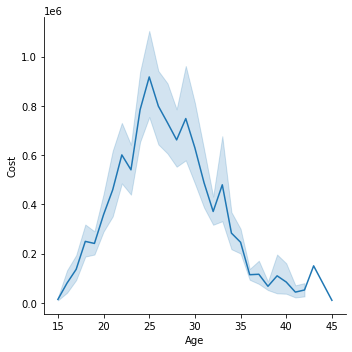

In [32]:
sns.relplot(x='Age',y='Cost',data=df,kind='line');

1. in the age between 20 and 35 the price of player is very high
2. the most cost in age almost 30
3. the less cost is a budding player

### Is month of transfer affect on player cost?

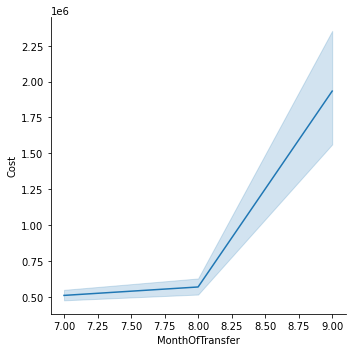

In [33]:
sns.relplot(x='MonthOfTransfer',y='Cost',data=df,kind='line');

1. if player transfers in month 9 , his cost will be very high
2. if player transfers in month 8 , his cost will be low

### Player position

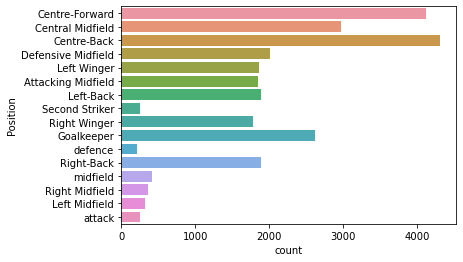

In [34]:
sns.countplot(y=df['Position']);

> The most common position in thus dataset is Center-Back and Centre-Forward but the lowest is attack

### Which position of player has the most expensive price ?

In [35]:
df.Cost.nunique()

116

<AxesSubplot:xlabel='Cost', ylabel='Position'>

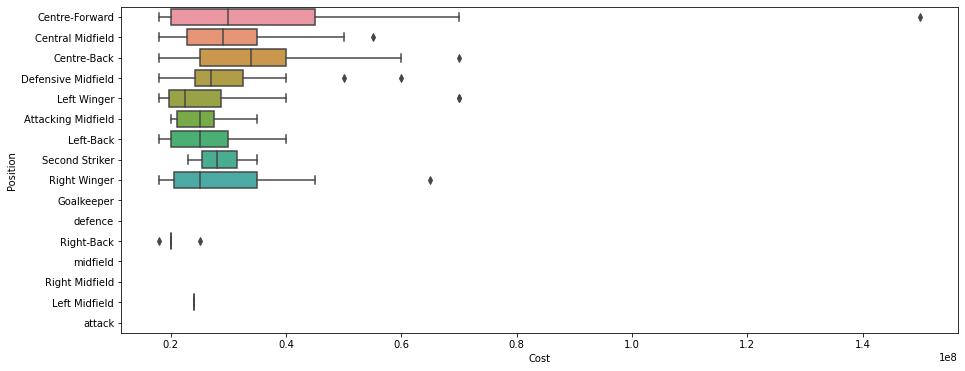

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df['Position'],x=df['Cost'].nlargest(120))

> when position of player is center-back is most expensive one

### Data Range constrains

In [37]:
df[df['Cost'] > 130000000]

,Name,Position,Age,OriginClub,LeagueOriginClub,CountryOriginClub,NewClub,LeagueNewClub,CountryNewClub,Cost,DateOfTransfer,MonthOfTransfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01,7


In [38]:
##=================================================================================
# Drop outlier value using .drop()
##=================================================================================
df.drop(df[df['Cost'] > 140000000].index, inplace = True)

### which country have spent more money?

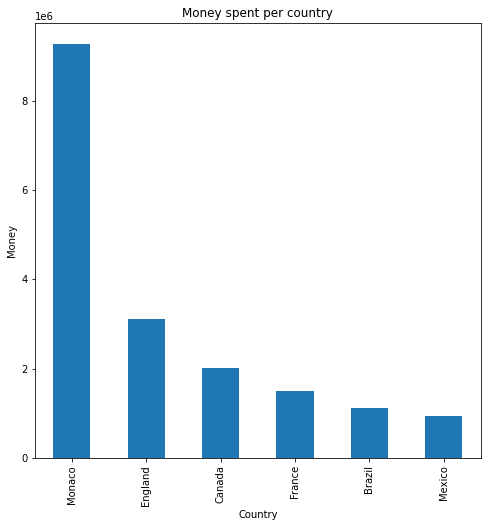

In [39]:
plt.figure(figsize=(8,8))
cost_country = df.groupby('CountryNewClub')['Cost'].mean().sort_values(ascending=False)
cost_country.nlargest(6).plot(kind='bar',xlabel='Country',ylabel='Money',title='Money spent per country');

> Monaco is the country which spent more money for transferring player to it

### Average of cost in every Clubs

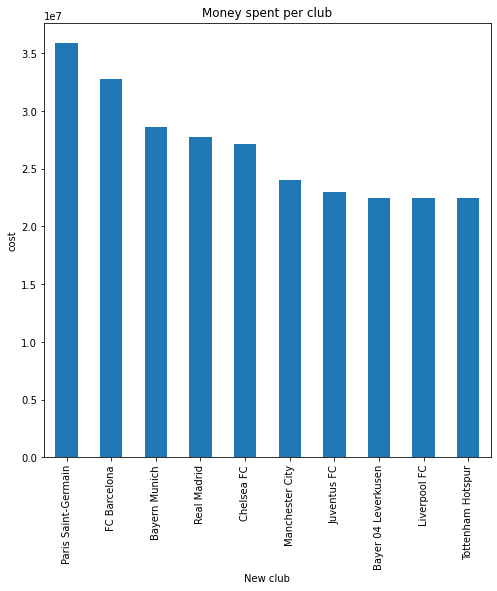

In [40]:
plt.figure(figsize=(8,8))
cost_country = df.groupby('NewClub')['Cost'].mean().sort_values(ascending=False)
cost_country.nlargest(10).plot(kind='bar',xlabel='New club',ylabel='cost',title='Money spent per club');

> Paris Sanit-Germain is the highst club spent money for data transfers

### which leagueNewClub spent more cost for players?

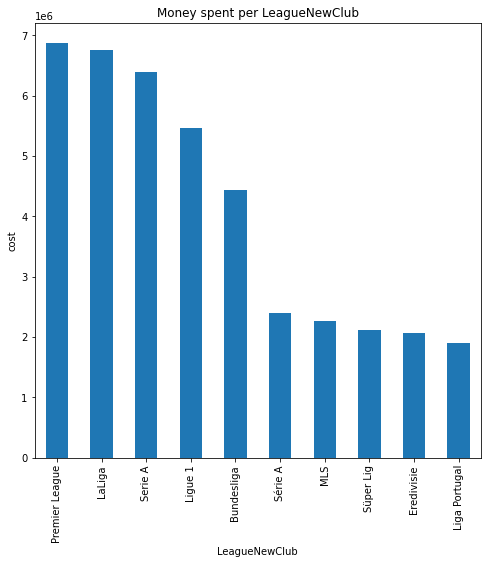

In [41]:
plt.figure(figsize=(8,8))
cost_country = df.groupby('LeagueNewClub')['Cost'].mean().sort_values(ascending=False)
cost_country.nlargest(10).plot(kind='bar',xlabel='LeagueNewClub',ylabel='cost',title='Money spent per LeagueNewClub');

> LaLiga is the most league club spent more money for players

### Top 10 Players in football transfer market

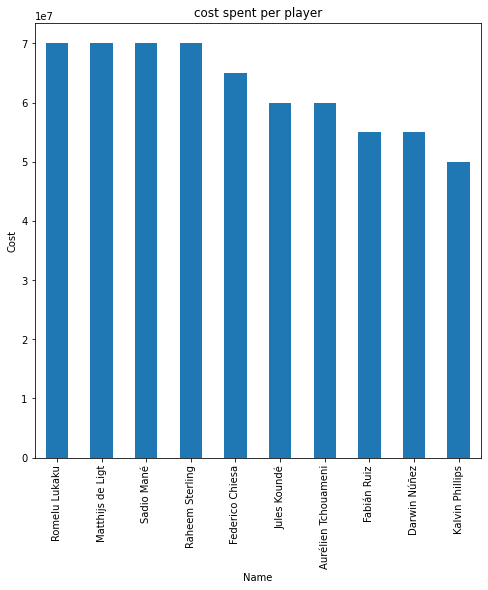

In [42]:
plt.figure(figsize=(8,8))
cost_country = df.groupby('Name')['Cost'].mean().sort_values(ascending=False)
cost_country.nlargest(10).plot(kind='bar',xlabel='Name',ylabel='Cost',title='cost spent per player');

> sadio mane, romelu lukaku , matthijs de light, raheem sterling are the most expensive players in footaball transfer

# 6. Preprocessing

In [43]:
# Converting categorical data into numerical by using label encoder
le=LabelEncoder()
column=['Name','Position','OriginClub','LeagueOriginClub','CountryOriginClub','NewClub','LeagueNewClub','CountryNewClub']
for i in column:
    df[i]=le.fit_transform(df[i])

In [44]:
df.head()

,Name,Position,Age,OriginClub,LeagueOriginClub,CountryOriginClub,NewClub,LeagueNewClub,CountryNewClub,Cost,DateOfTransfer,MonthOfTransfer
0,1796,3,22,3884,206,46,5326,221,45,42000000,2022-09-01,9
1,24538,3,25,5138,177,128,4593,191,117,18000000,2022-09-01,9
2,4293,1,25,5346,177,128,4268,221,45,50000000,2022-09-01,9
3,15455,2,27,891,66,49,3663,303,39,30000000,2022-09-01,9
4,25456,2,24,4934,206,46,3479,303,39,10000000,2022-09-01,9


In [45]:
# determine inputs and target
x=df.drop(['Cost','DateOfTransfer'],axis=1)
y=df['Cost']

In [46]:
##=================================================================================
# splitting data into training and testing data
##=================================================================================
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [47]:
##=================================================================================
#scaling all features in specific range based on equation z=(x-u)/s
##=================================================================================
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [48]:
x_train

array([[-0.87500903, -1.30468301, -0.78939472, ...,  0.11042298,
        -0.4675722 , -0.61454256],
       [ 0.98144476,  0.82940984, -1.00762447, ...,  0.11042298,
        -0.4675722 , -0.61454256],
       [ 1.41124274, -1.0379214 ,  1.17467304, ..., -0.46420029,
         0.39217143,  1.36046075],
       ...,
       [ 0.81170809,  0.02912502,  0.51998379, ..., -0.93156056,
         0.39217143,  1.36046075],
       [-0.12532776, -0.50439819, -0.57116497, ..., -0.85494412,
        -0.30637027, -0.61454256],
       [ 0.07885586, -0.50439819, -0.35293522, ..., -1.51384547,
        -1.78405462, -0.61454256]])

## Correlation between different features

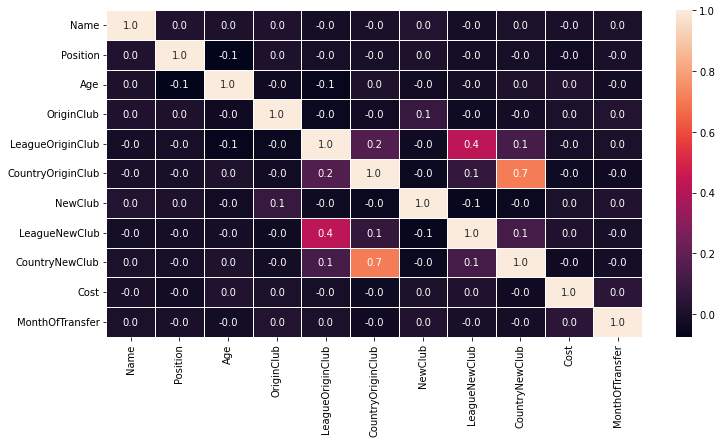

In [49]:
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,linewidth=1,fmt=".1f",ax=ax)
plt.show()

> its almost no relations between features

# 7.Modeling

## Regression

In [50]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [51]:
model.score(x_test,y_test)*100

0.40067733513888815

## Decision Tree

In [52]:
model2=DecisionTreeRegressor(max_depth=2)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)*100

1.076040741720874

In [53]:
model2.score(x_train,y_train)

0.01407431702829276

## KNN Algorithm

In [54]:
    
def train_model_and_show_scroe(ml_model, train_data=x_train, test_data=x_test):
    model = ml_model.fit(train_data, y_train)
    y_prediction=model.predict(test_data)
    
    print(f'Training score : {model.score(train_data, y_train)}')
    print(f'Testing score :  {model.score(test_data, y_test)}')
    print('=' * 60)

In [55]:
# 1. KNN
from sklearn.neighbors import KNeighborsRegressor
KNN_Model = KNeighborsRegressor(n_neighbors=3, weights="uniform", algorithm="auto")
train_model_and_show_scroe(KNN_Model)
print('\n\n')

Training score : 0.36775435913286414
Testing score :  -0.1592843560962498





> The best machine learning alggorithm and give high accuracy is decision trrr algorithm

## clustering

Divide dataset into groups of age based on cost of each group

In [56]:
X = df.loc[:, ['Age', 'Cost']].values
X.view()

array([[      22, 42000000],
       [      25, 18000000],
       [      25, 50000000],
       ...,
       [      16,    10000],
       [      18,    10000],
       [      19,    25000]])

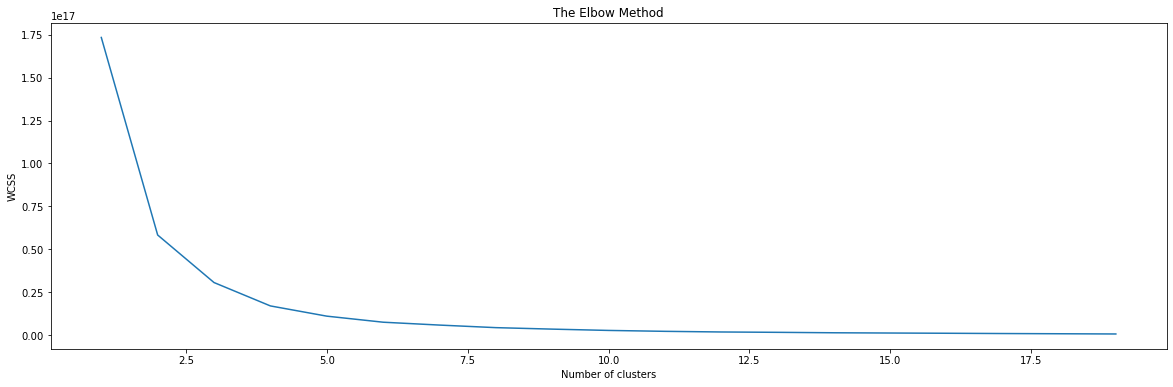

In [57]:
## Using the elbow method to find the optimal number of clusters(k-numbers):
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20, 6))   
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

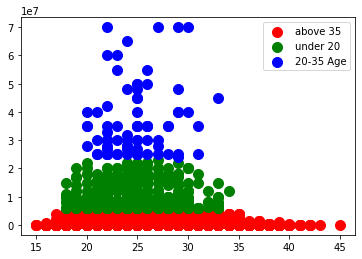

In [58]:
##=================================================================================
# build the model by using k-means algorithm
##=================================================================================
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
##=================================================================================
# Visualising the clusters
##=================================================================================
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'above 35')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'under 20')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = '20-35 Age')
plt.legend()
plt.show()

> Dataset is divided into three clusters based on cost of each group , first cluster is above 35 has a less cost and between 20-35 has high cost ever 

# 8. Conclusion

Here we reached at the end of the report which have involved :
1. the descripthion of our data
2. the information about its features
3. visualization them
4. cleaning undesrible data
5. finding relations between parameters
6. modeling by using ML algorithms as linear regression , Decision tree and clustering